In [10]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets._samples_generator import make_blobs

#Generate sample data
centers= [[1, 1], [-1, -1], [1,  -1], [-1, -1]]
X, labels_true = make_blobs(n_samples=400, centers= centers,
                             cluster_std= 0.5, random_state=0)

#Complete Affinity Propagation
af= AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices =af.cluster_centers_indices_
labels= af.labels_

n_clusters_ = len(cluster_centers_indices)

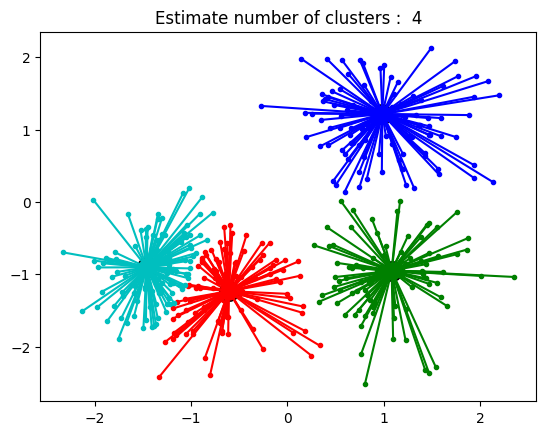

In [11]:
# Plot result 
import matplotlib.pyplot  as plt
from itertools import cycle 

plt.close('all')
plt.figure(1)
plt.clf()

colors=cycle ('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members ,1 ], col +'.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k', markersize=14)

    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1],x[1]], col)

plt.title('Estimate number of clusters : % d' % n_clusters_)
plt.show()